In [1]:
# Se importan las dependencias y librerias
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Se cargan las rutas de los archivos
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Se leen los archivos csv ciudad y camino y se almacenan en un data frame
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)

# Se vizualiza la información del archivo city 
#city_df.head()

# Se vizualiza la información del archivo ride 
#ride_df.head()

# Se combinan los data frames 
merge_city_ride_df = ride_df.merge(city_df, how='left', on='city', sort=False)

# Otras formas de hacer el mrge y el ordenamiento
# merge_city_ride_df = pd.merge(ride_df, city_df, on="city",how="left", sort="False")
# Se ordenan las columnas y los datos
#merge_city_ride_df = merge_city_ride_df.loc[:,['city', 'date','fare', 'ride_id','driver_count','type']]

# Muestra los datos del nuevo dataframe
merge_city_ride_df.head()

# Comentario:
# Se muestra la tabla compuesta con los datos de la ciudad y los datos de los viajes 

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

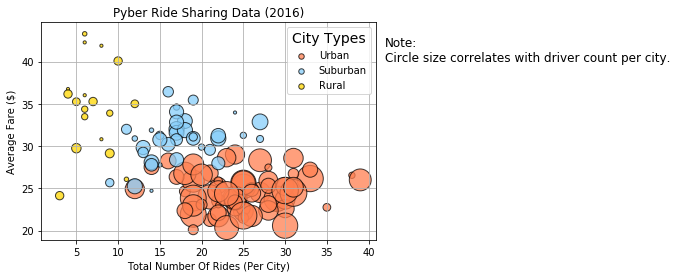

In [2]:
# Se crean variables auxiliares
handle_list = []
count = 0

# Obtiene los 3 diferentes tipos de ciudad y clores
city_types = merge_city_ride_df['type'].unique()
color_list = ['coral','lightskyblue','Gold']

#Se recorre los tipos de ciudad
for city_type in city_types:
    # Se seleccionan los renglones por tipos
    rows_type_df = merge_city_ride_df.loc[merge_city_ride_df['type']== city_type, ['city', 'ride_id', 'fare', 'driver_count']]
    # Se obtienen los totales por ordenamiento
    total_rides = rows_type_df.groupby(['city'])['ride_id'].count()
    # Se obtiene el promedio 
    avg_fare = rows_type_df.groupby(['city'])['fare'].mean()
    # Se obtiene el tamaño 
    sizes = rows_type_df.groupby(['city'])['driver_count'].first() * 10
    # Se construye el grafico
    handle = plt.scatter(total_rides, avg_fare, marker="o", color = color_list[count],
                         edgecolors="black", s=sizes, alpha=0.75, label=city_type)
    # Se agrega en una lista
    handle_list.append(handle)
    # Se suma el contador
    count += 1

# Se agregan las leyendas
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number Of Rides (Per City)")
plt.ylabel("Average Fare ($)")
lg = plt.legend(handles=handle_list, loc='best', title='City Types', fancybox=True,shadow=False)
lg.get_title().set_fontsize('14')

# Se establece el tamaño de cada grafico
for i,_ in enumerate(handle_list):
    lg.legendHandles[i]._sizes = [30] 

# Se agrega el grid
plt.grid()

# Se incorpora texto al grafico
plt.text(42, 40, 'Note:\nCircle size correlates with driver count per city.', fontsize=12)

# Se almacena el grafico
plt.savefig("../Images/BubblePlotRideSharing.png", bbox_inches="tight")

# Se muestra el grafico
plt.show()

# Comentario:
# En este grafico se muestra que en la ciudades urbanizadas hay mas viajes y en promedio son más baratos. posteriormente 
# en las ciudades suburbanas hay menos viajes y los precios aumentan. Finalmente en las ciudades Rurales hay muy pocos viajes
# y son mas costosos

## Total Fares by City Type

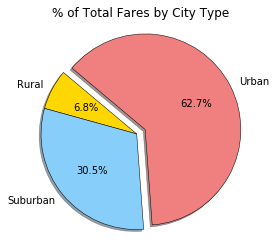

In [3]:
# Obtiene los totales de la tarifa por tipo
total_fare = merge_city_ride_df.groupby('type')['fare'].sum()

# Se crean los colores de la grafica
colors = ["gold", "lightskyblue", "lightcoral"]

# Separa cada seccion del grafico
explode = (0, 0, 0.1)

# Se genera la grafica
plt.pie(total_fare, startangle = 140, explode=explode, labels=total_fare.keys(), autopct="%1.1f%%",
        colors= colors, shadow=True, wedgeprops = {'linewidth': .5, 'edgecolor': 'black'})

# Se aregan los titulos de la grafica y el axis
plt.title('% of Total Fares by City Type')
plt.axis("image")

# Guarda el grafico
plt.savefig("../Images/TotalFaresCity.png")

# Comentario:
# En este grafico se muestra el porcentaje total por tarifa, las ciudades urbanas son el mejor mercado para la empresa,
# seguido de las ciudades suburbanas que representan la mitad de las ciudades urbanas y por ultimo el tipo Rural que
# representan muy poco de las tarifas 

## Total Rides by City Type

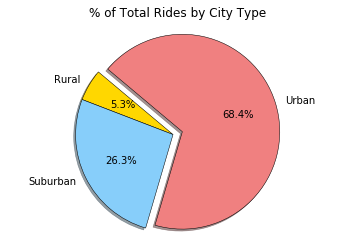

In [6]:
# Obtiene el total de viajes por ciudad
total_rides = merge_city_ride_df.groupby('type')['ride_id'].count()
#total_rides

# Sepera cada seccion en el grafico
explode = (0, 0, 0.1)

# Selecciona el color de cada parte de la grafica
colors = ["gold", "lightskyblue", "lightcoral"]

# Se genera la grafica
plt.pie(total_rides, explode=explode, labels=total_rides.keys(), autopct="%1.1f%%",
        colors= colors, shadow=True, startangle=140, wedgeprops = {'linewidth': .5, 'edgecolor': 'black'})

# Agrega titulos a la grafica y el axis
plt.title('% of Total Rides by City Type')
plt.axis("equal")

# Almacena la grafica en disco
plt.savefig("../Images/TotalRides.png")

# Muestra la grafica
plt.show()

# Comentario:
# En este grafico se muestra el porcentaje total por viajes, las ciudades urbanas son las que mas viajes se realizan con 68.4%,
# seguido de las ciudades suburbanas que representan el 26.3% y por ultimo el tipo Rural que
# representan muy pocos viajes con el 5.3%

## Total Drivers by City Type

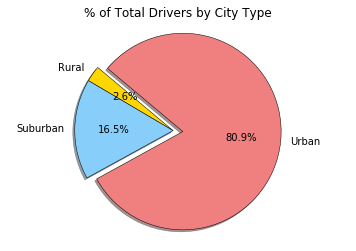

In [7]:
# Obtiene los conductores por ciudad
driver_city = merge_city_ride_df.groupby(['type','city'])['driver_count'].first()

# Suma los conductores
total_drivers = driver_city.groupby('type').sum()

# Sepera cada seccion en el grafico
explode = (0, 0, 0.1)

# Selecciona el color de cada parte de la grafica
colors = ["gold", "lightskyblue", "lightcoral"]

# Se genera la grafica y axis
plt.pie(total_drivers, explode=explode, labels=total_drivers.keys(), autopct="%1.1f%%",
        colors= colors, shadow=True, startangle=140, wedgeprops = {'linewidth': .5, 'edgecolor': 'black'})

# Agrega titulos a la grafica
plt.title('% of Total Drivers by City Type')
plt.axis("equal")

# Almacena la grafica en disco
plt.savefig("../Images/TotalDrivers.png")

# Muestra la grafica
plt.show()

# Comentario:
# En este grafico se muestra el porcentaje total por conductores de la, las ciudades urbanas son el mejor mercado para la empresa,
# seguido de las ciudades suburbanas que representan la mitad de las ciudades urbanas y por ultimo el tipo Rural que
# representan muy poco de las tarifas 